# Zomato Using Exploratory Data Analysis

# Import Library

In [150]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## **Data Cleaning and Preparation:**

In [151]:
# Load the dataset
df = pd.read_csv("zomato.csv", encoding="latin-1")
df.columns
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [152]:
# Explore the data
print(df.head())  # Display the first few rows

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [153]:
# Load secand dataset
df1=pd.read_csv("Country-Code.csv")
print(df1.head())

   Country Code    Country
0             1      India
1            14  Australia
2            30     Brazil
3            37     Canada
4            94  Indonesia


In [154]:
# Find index of the second dataset
len(df1.index)

15

In [155]:
# Merge the two dataset
df2=pd.merge(df,df1,on="Country Code",how="left")
df2.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [156]:
pip install --upgrade pandas

In [157]:
# Let's take a peak into the data's basic information
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [158]:
# Any duplicates?
df2.duplicated().sum()

0

Because there is no null or duplicatwe i will not use drop code

In [159]:
#show the number of unique user
df2.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

In [160]:
#Number of cloumns in dataset
df2.shape

(9551, 22)

In [161]:
#Name of cloumns in dataset
df2.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [162]:
# Check data types of each column
print(df2.dtypes)

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object


In [163]:
# Summary statistics
print(df2.describe())

       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000        

In [164]:
#Info on the dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

### Univariae Exploration

Here we will look at each feature and decide to consider them for our analysis or not:

- aggregate_rating - Rating given to the restaurant
- rating_text - Characterisation of numeric rating into bins by using labels. We will be using direct ratings in our analysis, so we can ignore this. Moreover, rating text is in different languages which would obfuscate our analysis.
- votes - Number of votes contributing to the rating

In [165]:
# Check unique values in 'Restaurant Name' column
print(df2['Restaurant Name'].unique())
print(df2["Restaurant Name"].unique()[0])
print(type(df2["Restaurant Name"].unique()[0]))

['Le Petit Souffle' 'Izakaya Kikufuji' 'Heat - Edsa Shangri-La' ...
 'Huqqa' 'A\x81ô\x81ôk Kahve' "Walter's Coffee Roastery"]
Le Petit Souffle
<class 'str'>


In [166]:
# To filtar chain and single resturant
chains = df2["Restaurant Name"]
single = df2["Restaurant Name"]

In [167]:
chains

0               Le Petit Souffle
1               Izakaya Kikufuji
2         Heat - Edsa Shangri-La
3                           Ooma
4                    Sambo Kojin
                  ...           
9546                NamlÛ± Gurme
9547               Ceviz AÛôacÛ±
9548                       Huqqa
9549                Aôôk Kahve
9550    Walter's Coffee Roastery
Name: Restaurant Name, Length: 9551, dtype: object

In [168]:
single

0               Le Petit Souffle
1               Izakaya Kikufuji
2         Heat - Edsa Shangri-La
3                           Ooma
4                    Sambo Kojin
                  ...           
9546                NamlÛ± Gurme
9547               Ceviz AÛôacÛ±
9548                       Huqqa
9549                Aôôk Kahve
9550    Walter's Coffee Roastery
Name: Restaurant Name, Length: 9551, dtype: object

In [169]:
# Check Restaurant Name value count
df2["Restaurant Name"].value_counts()

Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: count, Length: 7446, dtype: int64

In [170]:
print("Total Restaurants = ", df.shape[0])

Total Restaurants =  9551


In [171]:
# Check unique values in 'city' column
df2['City'].unique()

array(['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
       'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City',
       'Taguig City', 'Brasí_lia', 'Rio de Janeiro', 'Sí£o Paulo',
       'Albany', 'Armidale', 'Athens', 'Augusta', 'Balingup',
       'Beechworth', 'Boise', 'Cedar Rapids/Iowa City', 'Chatham-Kent',
       'Clatskanie', 'Cochrane', 'Columbus', 'Consort', 'Dalton',
       'Davenport', 'Des Moines', 'Dicky Beach', 'Dubuque',
       'East Ballina', 'Fernley', 'Flaxton', 'Forrest', 'Gainesville',
       'Hepburn Springs', 'Huskisson', 'Inverloch', 'Lakes Entrance',
       'Lakeview', 'Lincoln', 'Lorn', 'Macedon', 'Macon', 'Mayfield',
       'Mc Millan', 'Middleton Beach', 'Miller', 'Monroe', 'Montville',
       'Ojo Caliente', 'Orlando', 'Palm Cove', 'Paynesville', 'Penola',
       'Pensacola', 'Phillip Island', 'Pocatello', 'Potrero', 'Princeton',
       'Rest of Hawaii', 'Savannah', 'Singapore', 'Sioux City',
       'Tampa Bay', 'Tanunda', 'Trentha

In [172]:
# Check unique and nunique values in 'Average Cost for two' column
df2["Average Cost for two"].nunique()
df2["Average Cost for two"].unique()

array([  1100,   1200,   4000,   1500,   1000,   2000,   6000,    800,
          900,    700,    850,    600,   3000,   1800,     55,     30,
           45,     60,     50,     80,     90,    200,    150,    100,
          230,    240,    350,    140,    170,    120,    250,     40,
           70,    300,     85,     75,    400,     65,     25,     10,
            0,     20,     35,      7,    270,    500,    430,    315,
          220,     95,    190,    260,    180,    330,    280,    160,
          285,    130,    110,   2500,   3600,    550,   1400,    450,
          950,    650,   1300,   2400,   1600,   2200,    750,   1700,
         1250,   1900,   2700,   3500,   5000,   2300,   1750,   3200,
         2100,   1850,   4500,   3300,   1350,   1650,   1950,   1050,
          290,   1450,   2800,   3650,   4800,   1550,    720,   6500,
         7000,   1150,   2900,   2600,   4700,   3700,   3800,   4100,
         4300,   2650,   5100,   5500,   4400,   4200,   8000,   2350,
      

In [173]:
# Check unique and nunique values and value count in 'Price range' column
df2["Price range"].unique()

array([3, 4, 2, 1])

In [174]:
df2["Price range"].value_counts()

Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64

In [175]:
# Check unique and nunique values and value count in 'Average Cost for two' column
df2["Average Cost for two"].value_counts()

Average Cost for two
500       900
300       897
400       857
200       687
600       652
         ... 
8000        1
2350        1
150000      1
70000       1
545         1
Name: count, Length: 140, dtype: int64

In [176]:
df2["Aggregate rating"].value_counts()

Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64

In [177]:
# Check unique value count in 'votes' column
df2["Votes"].value_counts()

Votes
0      1094
1       483
2       327
3       244
4       207
       ... 
615       1
538       1
823       1
650       1
901       1
Name: count, Length: 1012, dtype: int64

In [178]:
# Check unique values in 'currency' column
df2["Currency"].unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(\x8c£)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

 Only one category of currency is in our data therefore, it is not useful and can be omitted from our analysis

In [179]:
# Check unique values in 'currency' column
print(df2["Locality"].nunique())
df2["Locality"].unique()

1208


array(['Century City Mall, Poblacion, Makati City',
       'Little Tokyo, Legaspi Village, Makati City',
       'Edsa Shangri-La, Ortigas, Mandaluyong City', ..., 'Ko\x81ôuyolu',
       'Kuruí_e\x81ôme', 'Moda'], dtype=object)

In [180]:
# Check unique and nunique values in 'Locality Verbose' column
df2["Locality Verbose"].nunique()
df2["Locality Verbose"].unique()

array(['Century City Mall, Poblacion, Makati City, Makati City',
       'Little Tokyo, Legaspi Village, Makati City, Makati City',
       'Edsa Shangri-La, Ortigas, Mandaluyong City, Mandaluyong City',
       ..., 'Ko\x81ôuyolu, ÛÁstanbul', 'Kuruí_e\x81ôme, ÛÁstanbul',
       'Moda, ÛÁstanbul'], dtype=object)

Although "locality" can be an interesting feature, but since the feature has so many unique classes, we will avoid it for initial analysis

Although "locality_verbose" can be an interesting feature, but since the feature has so many unique categories, we will avoid it for initial analysis

In [181]:
# Check unique and nunique values in 'Rating text' column
print(df2["Rating text"].nunique())
df2["Rating text"].unique()

6


array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

In [182]:
# Check unique and nunique values in 'Aggregate rating' column
print(df2["Aggregate rating"].nunique())
df2["Aggregate rating"].unique()

33


array([4.8, 4.5, 4.4, 4.9, 4. , 4.2, 4.3, 3.6, 4.7, 3. , 3.8, 3.7, 3.2,
       3.1, 0. , 4.1, 3.3, 4.6, 3.9, 3.4, 3.5, 2.2, 2.9, 2.4, 2.6, 2.8,
       2.1, 2.7, 2.5, 1.8, 2. , 2.3, 1.9])

In [183]:
# Explain the aggregate rating through color , text and count
df2.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:"Rating Count"})

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [184]:
# Check unique values in 'cuisines' column
print(df2['Cuisines'].unique())

['French, Japanese, Desserts' 'Japanese'
 'Seafood, Asian, Filipino, Indian' ... 'Burger, Izgara'
 'World Cuisine, Patisserie, Cafe' 'Italian, World Cuisine']


In [185]:
# Group the data by city
city = df2.groupby('City')

# Calculate aggregate statistics
citys = city.agg({
    'Restaurant Name': 'count', # Number of restaurants
    'Aggregate rating': 'mean', # Average rating
    'Average Cost for two': 'mean', # Average cost for two
    'Cuisines': lambda x: x.value_counts() # Most common cuisine
})

# Display the aggregated statistics
print(citys)

                 Restaurant Name  Aggregate rating  Average Cost for two  \
City                                                                       
Abu Dhabi                     20          4.300000            182.000000   
Agra                          20          3.965000           1065.000000   
Ahmedabad                     21          4.161905            857.142857   
Albany                        20          3.555000             19.750000   
Allahabad                     20          3.395000            517.500000   
...                          ...               ...                   ...   
Weirton                        1          3.900000             25.000000   
Wellington City               20          4.250000             71.250000   
Winchester Bay                 1          3.200000             25.000000   
Yorkton                        1          3.300000             25.000000   
ÛÁstanbul                     14          4.292857             81.428571   

           

In [186]:
# Analyze the types of cuisines that are popular in different regions
popular = df['Cuisines'].value_counts().head(10)
print("Top 10 Popular Cuisines:")
print(popular)

Top 10 Popular Cuisines:
Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


In [187]:
Name = df2["Restaurant Name"].value_counts()[df2["Restaurant Name"].value_counts() > 4]

# Convert 'aggregate_rating' to numeric, coerce errors to NaN
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'])

# Filter rows where 'name' is in atleast_5_outlets.index
filtered = df[df["Restaurant Name"].isin(Name.index)]

# Group by 'name' and calculate the mean of 'aggregate_rating'
mean = filtered.groupby("Restaurant Name")["Aggregate rating"].mean()

# Sort the mean ratings in descending order and select the top 10
top10 = mean.sort_values(ascending=False)[:10].sort_values(ascending=True)

print(top10)

Restaurant Name
Starbucks          3.805556
L'Opera            3.820000
TGI Friday's       3.850000
Texas Roadhouse    3.860000
Happy Hakka        3.860000
Mocha              4.185714
Punjab Grill       4.340000
Barbeque Nation    4.353846
Farzi Cafe         4.366667
Chili's            4.580000
Name: Aggregate rating, dtype: float64


## **Exploratory Data Analysis:**

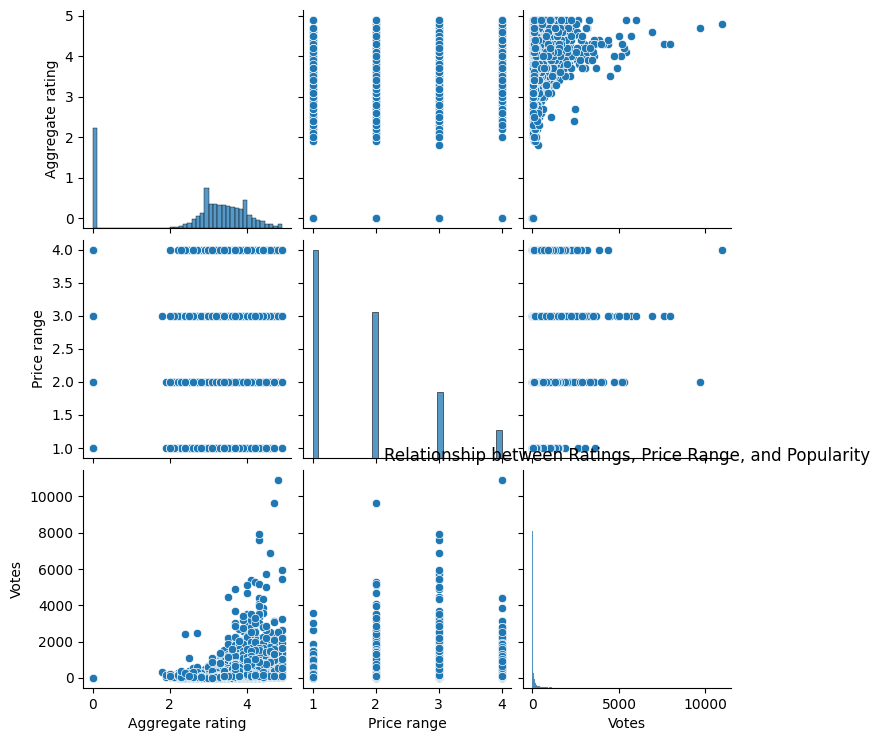

In [188]:
# Examine the relationship between restaurant ratings, price range, and popularity
sns.pairplot(df2[['Aggregate rating', 'Price range', 'Votes']])
plt.title('Relationship between Ratings, Price Range, and Popularity')
plt.show()

**observation**

in this observation it obviouse that the popularity of the resturant depend on rating the more good rating the more customers and it's price

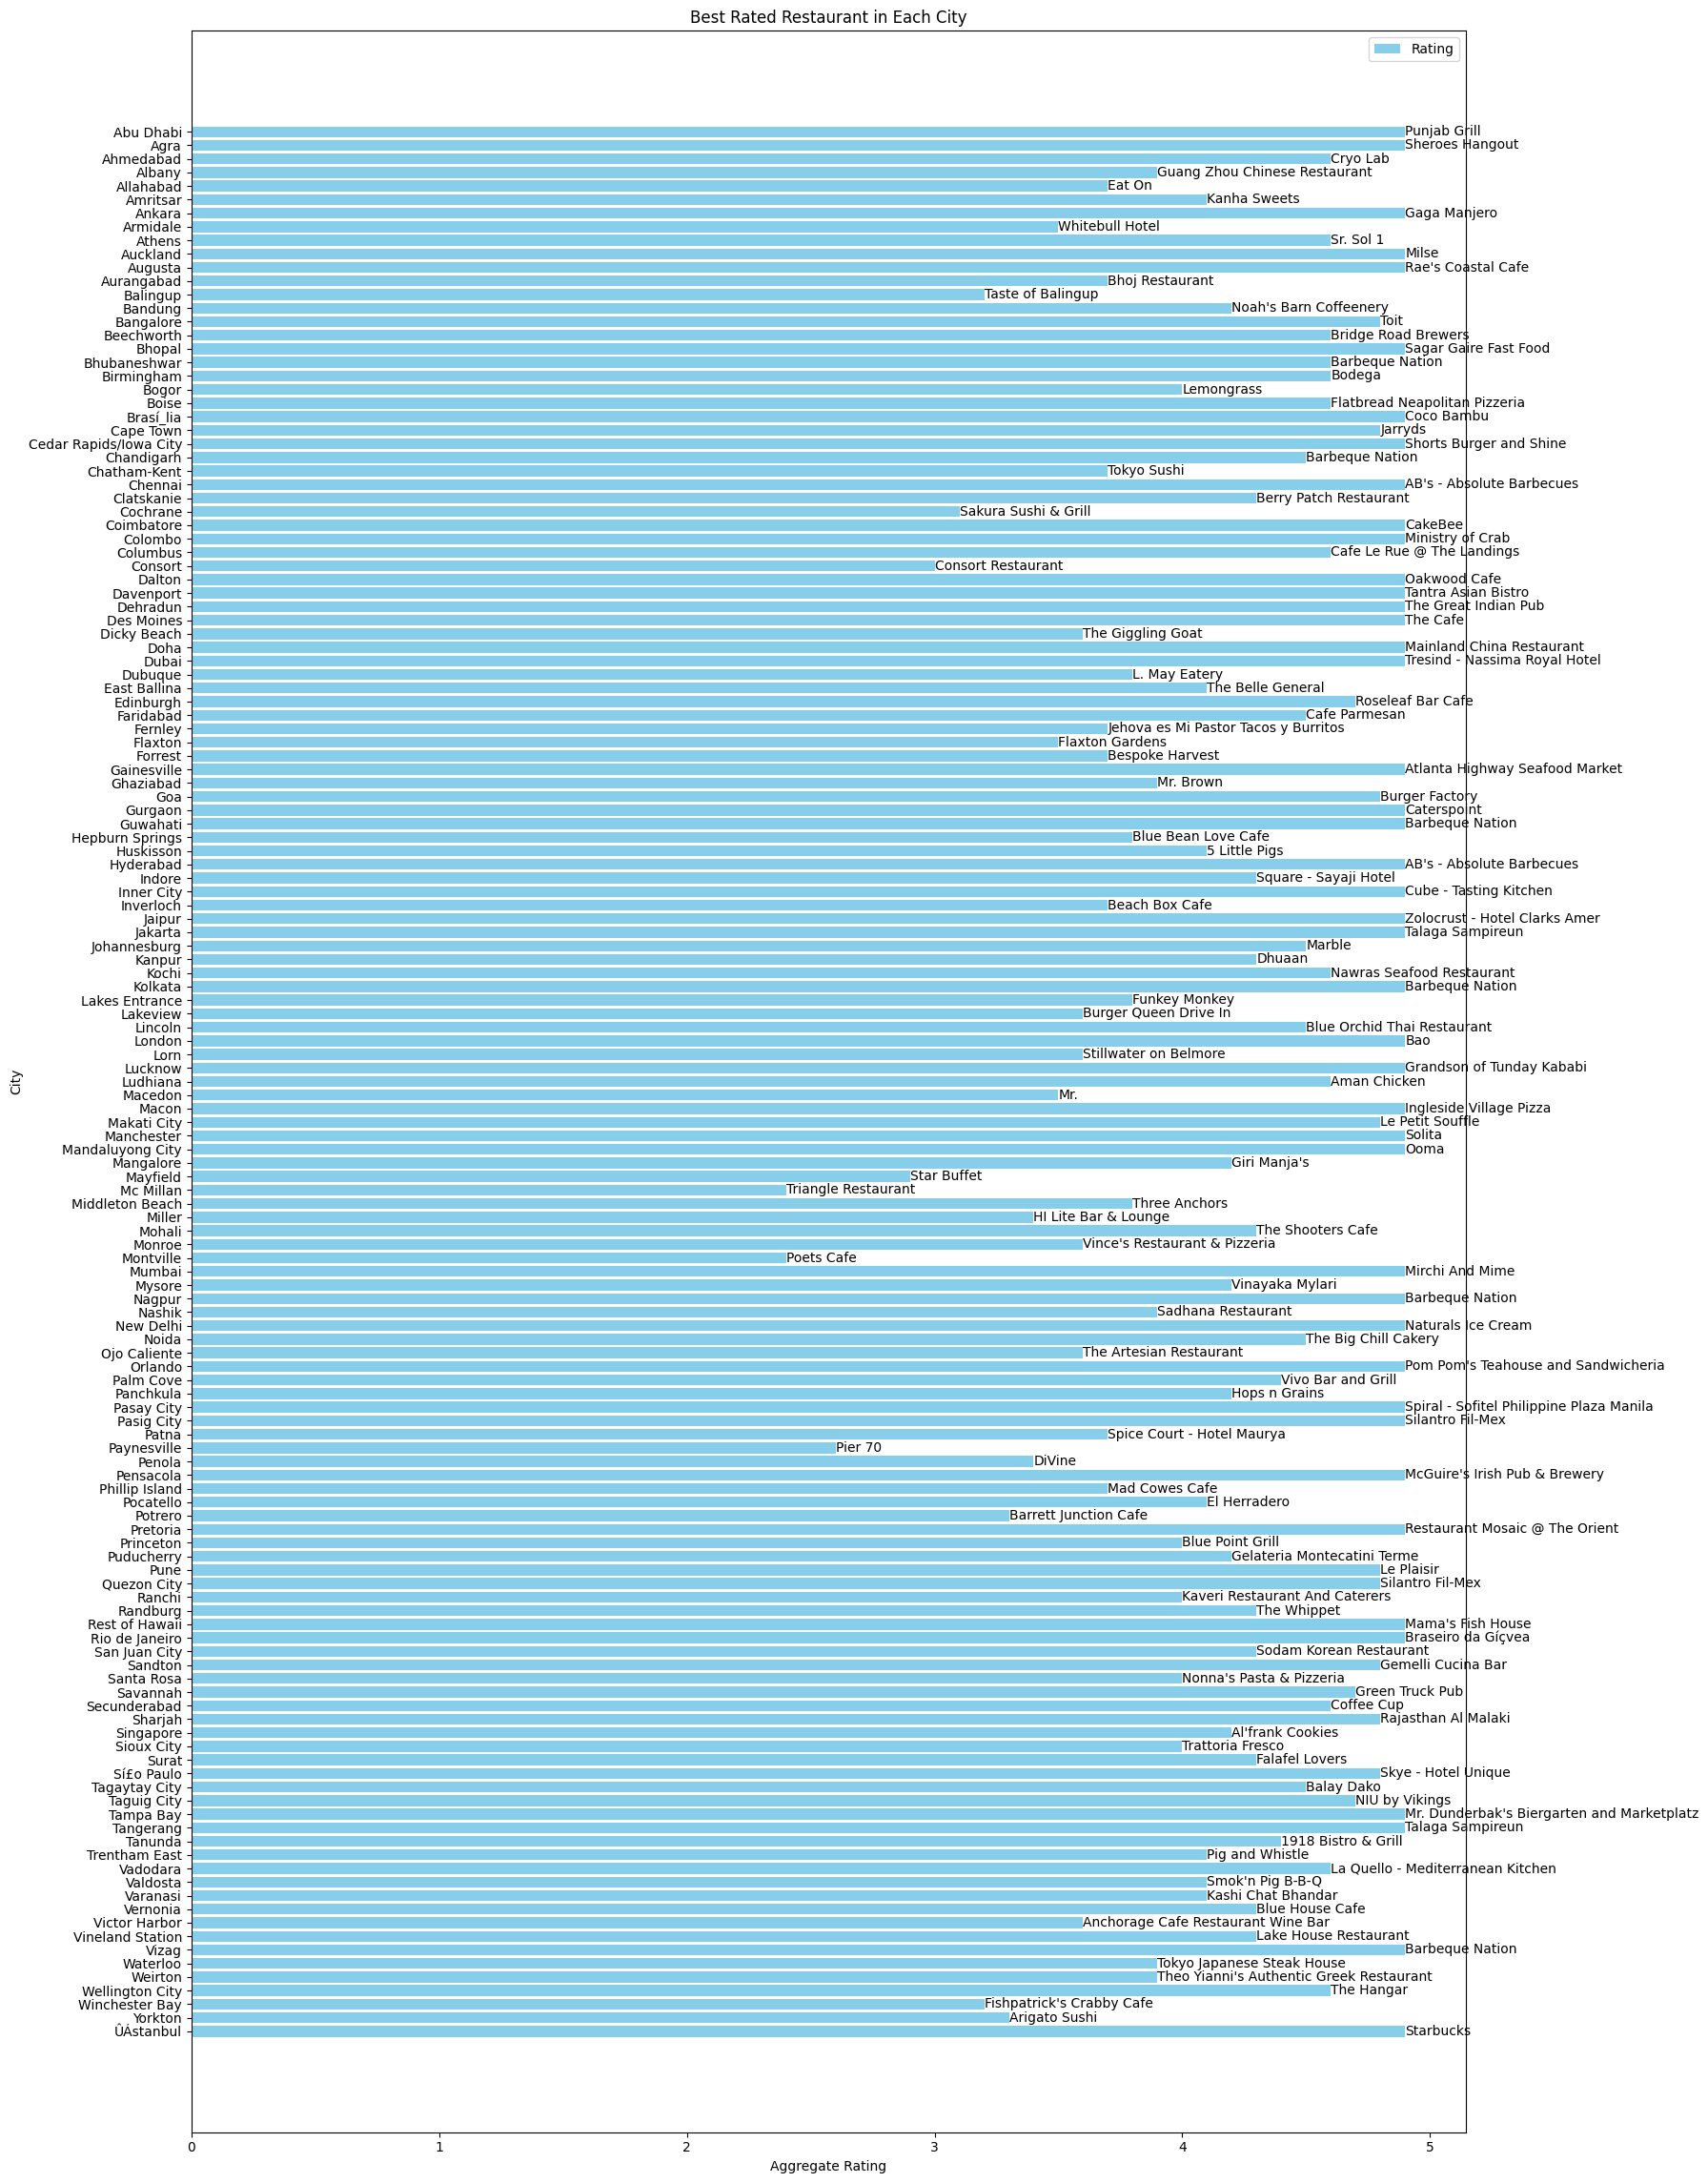

In [189]:
# Assuming 'df2' is your existing DataFrame

# Check if 'Aggregate rating' column exists
if 'Aggregate rating' not in df2.columns:
    print("Error: 'Aggregate rating' column not found in DataFrame")
    exit()

# Group data by city
grouped_data = df2.groupby('City')

# Initialize empty lists
cities = []
best_restaurant_names = []
best_restaurant_ratings = []

# Loop through each city group
for city, data in grouped_data:
    # Sort by rating (descending) and get the first row (highest-rated)
    best_rated_restaurant = data.sort_values(by='Aggregate rating', ascending=False).iloc[0]
    cities.append(city)
    best_restaurant_names.append(best_rated_restaurant['Restaurant Name'])
    best_restaurant_ratings.append(best_rated_restaurant['Aggregate rating'])

# Plot the data
plt.figure(figsize=(18, 23))

# Plot the ratings as bars
plt.barh(cities, best_restaurant_ratings, color='skyblue', label='Rating')

# Plot restaurant names as annotations
for i, city in enumerate(cities):
    plt.text(best_restaurant_ratings[i], i, best_restaurant_names[i], ha='left', va='center', fontsize=10)

# Customize the plot
plt.title('Best Rated Restaurant in Each City')
plt.xlabel('Aggregate Rating')
plt.ylabel('City')
plt.gca().invert_yaxis()  # Invert y-axis for highest-rated on top
plt.legend()
plt.tight_layout()
plt.show()

**Observation:**


Fast food chains are missing from the top-rated restaurants. This shows that it's hard to both be fast and provide excellent service. This suggests good service is linked to high ratings, meaning happy customers come from great service, especially when there are many fast food places around.

In [190]:
atleast_5_outlets = outlets[outlets > 4] # I have set the criteria of number of outlets to greater than 4 to remove some outliers.


In [191]:

# Convert 'aggregate_rating' to numeric, coerce errors to NaN
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')

# Filter rows where 'name' is in atleast_5_outlets.index
filtered_df = df[df["Restaurant Name"].isin(atleast_5_outlets.index)]

# Group by 'name' and calculate the mean of 'aggregate_rating'
mean_ratings = filtered_df.groupby("Restaurant Name")["Aggregate rating"].mean()

# Sort the mean ratings in descending order and select the top 10
top10_chains_r = mean_ratings.sort_values(ascending=False)[:10].sort_values(ascending=True)

print(top10_chains_r)

Restaurant Name
Starbucks          3.805556
L'Opera            3.820000
TGI Friday's       3.850000
Texas Roadhouse    3.860000
Happy Hakka        3.860000
Mocha              4.185714
Punjab Grill       4.340000
Barbeque Nation    4.353846
Farzi Cafe         4.366667
Chili's            4.580000
Name: Aggregate rating, dtype: float64


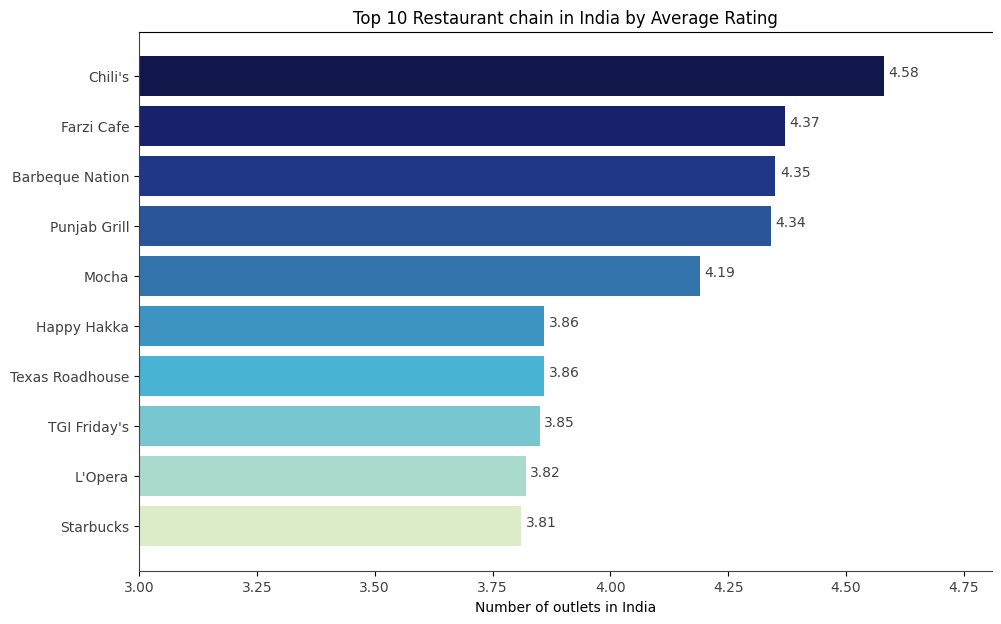

In [192]:
height = pd.Series(top10_chains_r.values).map(lambda x : np.round(x, 2))
bars = top10_chains_r.index
y_pos = np.arange(len(bars))
bars = top10_chains_r.index


fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ['#dcecc9', '#aadacc', '#78c6d0', '#48b3d3', '#3e94c0', '#3474ac', '#2a5599', '#203686', '#18216b', '#11174b']
plt.barh(y_pos, height, color=colors)

plt.xlim(3)
plt.xticks(color="#424242")
plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of outlets in India")

for i, v in enumerate(height):
    ax.text(v + 0.01, i, str(v), color='#424242')
plt.title("Top 10 Restaurant chain in India by Average Rating")


plt.show()

**Observation:** According to the above visualization, Indian market is majorly dominaed by big fast food chains. This passage discusses the connection between service quality and customer satisfaction in the restaurant industry. It highlights the absence of fast food chains from top-rated establishments, suggesting a challenge in maintaining excellent service with a high number of locations. This emphasizes the importance of consistent service delivery for achieving high customer satisfaction, particularly in a competitive market.

In [193]:
# Highly rated Resturants Location
top_rated=df2[df2['Aggregate rating']>4.5]
fig = px.scatter_mapbox(top_rated, lat="Latitude", lon="Longitude", hover_name="City", hover_data=["Aggregate rating", "Restaurant Name"],
                        color_discrete_sequence=["fuchsia"], zoom=4, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(title='Highly rated Resturants Location',
                  autosize=True,
                  hovermode='closest',
                  showlegend=False)
fig.update_layout(
    autosize=False,
    width=800,
    height=500,)

fig.show()

**Observation**

From this observation we see that the city with higer rating is capital and this related that it has different type of resturant that provide different types of dishes and entertament

# Machine Learning

In [194]:
# Convert categorical variable into dummy/indicator variables
data = pd.get_dummies(df2)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the target variable and the features
y = data['Aggregate rating']
X = data.drop('Aggregate rating', axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize the results
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression Model - True vs Predicted Values')
plt.grid(True)
plt.show()
